In [1]:
import pandas as pd
import numpy as np

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/HP/machineLearning/linearRegression/auto_mpg_dataset.csv')

In [3]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [4]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
mpg             398 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [46]:
df.shape

(398, 9)

### Linear Regression will be performed on this dataset 
#### mpg (miles per gallon) is our target variable
#### Let's select the feature variables

In [15]:
df[['cylinders','displacement','horsepower','weight','acceleration','mpg']].corr()

,cylinders,displacement,horsepower,weight,acceleration,mpg
cylinders,1.000000,0.950721,0.084291,0.896017,-0.505419,-0.775396
displacement,0.950721,1.000000,0.079333,0.932824,-0.543684,-0.804203
horsepower,0.084291,0.079333,1.000000,0.071114,-0.080685,-0.073501
weight,0.896017,0.932824,0.071114,1.000000,-0.417457,-0.831741
acceleration,-0.505419,-0.543684,-0.080685,-0.417457,1.000000,0.420289
mpg,-0.775396,-0.804203,-0.073501,-0.831741,0.420289,1.000000


In [18]:
from scipy import stats
corr,p = stats.pearsonr(df['cylinders'],df['mpg']) 
corr,p

(-0.7753962854205543, 4.5039922461774475e-81)

<h6> p value is less than 0.001 hence correlation is extremely significant and there is strong negative correlation between these two variables.  </h6>

In [19]:
corr,p = stats.pearsonr(df['displacement'],df['mpg']) 
corr,p

(-0.804202824805898, 1.6558889101928776e-91)

<h6> Strong negative correlation and statistically significant </h6> 

In [20]:
corr,p = stats.pearsonr(df['horsepower'],df['mpg']) 
corr,p

(-0.07350087226145319, 0.14327423855965674)

<h6> weak correlation, no statistical significance </h6>

In [22]:
corr,p = stats.pearsonr(df['weight'],df['mpg']) 
corr,p

(-0.831740933244335, 2.9727995640501474e-103)

<h6> strong correlation, strong statistical significance </h6>

In [24]:
corr,p = stats.pearsonr(df['acceleration'],df['mpg']) 
corr,p

(0.4202889121016506, 1.8230915350787896e-18)

(0, 48.51925584046059)

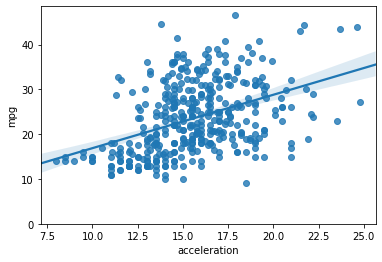

In [27]:
sns.regplot(x='acceleration',y='mpg',data=df)
plt.ylim(0,)

<h6> we can see some nice correlation here and it is statistically significant </h6>

### Feature Variables:   
###### cylinders, displacement, weight, acceleration

In [39]:
X = df[['cylinders','displacement','weight','acceleration']]

### Multiple Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [41]:
model.fit(X,df['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
model.intercept_

41.86097520182309

In [43]:
model.coef_

array([-0.25922287, -0.00711292, -0.00615502,  0.17513085])

### Visualize the model using Distribution Plot

In [44]:
Yhat = model.predict(X)

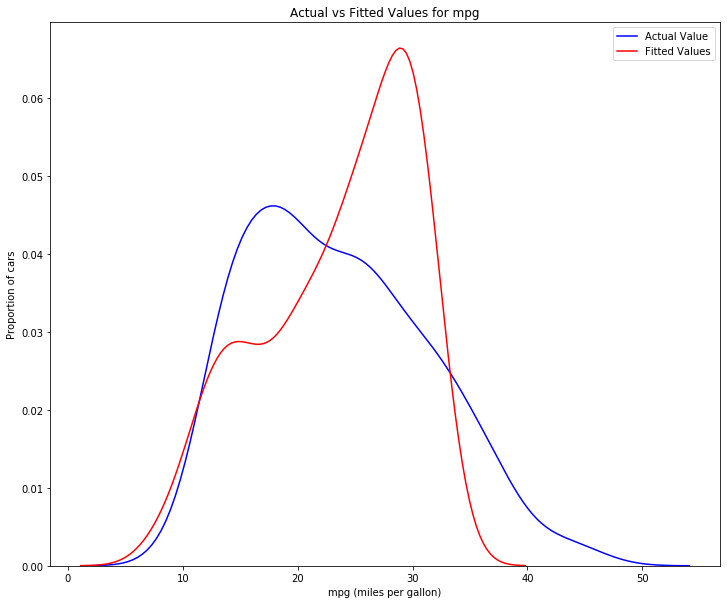

In [45]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['mpg'], hist=False, color="b", label="Actual Value")
sns.distplot(Yhat, hist=False, color="r", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg (miles per gallon)')
plt.ylabel('Proportion of cars')

plt.show()
plt.close()

### Note: 
From the distribution plot, it can be seen that from 0 to 15 the model is working really well. From 15 to 35 there is a great difference between fitted and actual values. From 35 to 40 the difference in values is close. The model is not working for values above 40. Hence it is concluded that the model is not ideal. A better set of features or a non-linear model is required.

###### From the graph, it is clear that multiple linear regression is not working well.

### R^2 and mean square error (MSE)

In [47]:
#R^2
r_square = model.score(X,df['mpg'])
r_square

0.7006973903323617

In [49]:
from sklearn.metrics import mean_squared_error
y_predict = model.predict(X)
mse = mean_squared_error(df['mpg'],y_predict)
mse

18.238339526490645

###### The model has a higher r square value and smaller MSE. It is pretty good

### Polynomial Regression (degree = 2)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
#pr = PolynomialFeatures(degree=2, include_bias=False)
#x_polly = pr.fit_transform(X)
#x_polly

In [60]:
from sklearn.pipeline import Pipeline
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]

In [61]:
#pipeline constructor
pipe = Pipeline(Input)

In [63]:
#train the pipeline
pipe.fit(X,df['mpg'])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [64]:
ypipe = pipe.predict(X)

In [65]:
ypipe[0:4]

array([16.79091976, 15.64630322, 16.94790959, 17.07881713])

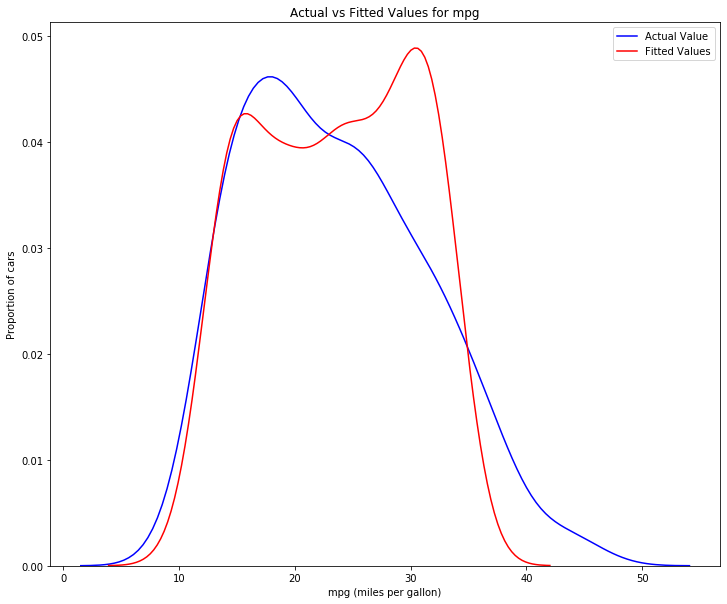

In [66]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['mpg'], hist=False, color="b", label="Actual Value")
sns.distplot(ypipe, hist=False, color="r", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for mpg')
plt.xlabel('mpg (miles per gallon)')
plt.ylabel('Proportion of cars')

plt.show()
plt.close()

###### with polynomial regression, we can see that graph fits better as compared to multiple linear regression.

#### R^2 and MSE

In [68]:
#r^2
from sklearn.metrics import r2_score
r_squared = r2_score(df['mpg'], ypipe)
r_squared

0.7401868933620959

In [70]:
mean_squared_error(df['mpg'], ypipe)

15.832002459171237

###### R^2 has increased and MSE has decreased which shows pol